<a href="https://colab.research.google.com/github/Amrutha1103/INFO7390/blob/main/understanding_data_worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Understanding Data worked example.

This notebook is about the worked example to understand data using sentiment analysis. I have used ChatGPT sentiment Analysis dataset to illustrate the information .

About this Dataset:

ChatGPT has been a major talk in the tech world. The tweets about chatgpt were gathered for a month and then the sentiment analysis was made using Natural Language Processing.

Contents:


* Data Preprocessing

* Data Visualization

* Model Selection

* Hyperparameter tuning


In [1]:
# Import data processing modules

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/file.csv")

In [3]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [4]:
#Data preprocessing

# Remove the 'Unnamed: 0' column

df = df[['tweets', 'labels']]

In [5]:
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [6]:
# View the first 10 rows in the tweets column

for i in df.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [7]:
# To remove all the tweet links since they all begin with https:

df['tweet_list'] = df['tweets'].str.split('https:')

In [8]:
df.head()

,tweets,labels,tweet_list
0,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
1,"Try talking with ChatGPT, our new AI system wh...",good,"[Try talking with ChatGPT, our new AI system w..."
2,ChatGPT: Optimizing Language Models for Dialog...,neutral,[ChatGPT: Optimizing Language Models for Dialo...
3,"THRILLED to share that ChatGPT, our new model ...",good,"[THRILLED to share that ChatGPT, our new model..."
4,"As of 2 minutes ago, @OpenAI released their ne...",bad,"[As of 2 minutes ago, @OpenAI released their n..."


In [9]:
# Select the text part of the list

text = [i[0] for i in df.tweet_list]

In [11]:
df['text'] = text
df = df[['text', 'labels']]
df.head()

,text,labels
0,ChatGPT: Optimizing Language Models for Dialogue,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialogue,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [12]:
#import re for string processing

import re

In [13]:
# Remove all non-alphanumeric characters from the text list

string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [14]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [15]:
df['text'] = trim_list
df.head()

,text,labels
0,ChatGPT Optimizing Language Models for Dialogue,neutral
1,Try talking with ChatGPT our new AI system whi...,good
2,ChatGPT Optimizing Language Models for Dialogue,neutral
3,THRILLED to share that ChatGPT our new model o...,good
4,As of 2 minutes ago OpenAI released their new ...,bad


####Data Visualization with word cloud

In [17]:
#Data Visualization with word cloud

!pip install wordcloud

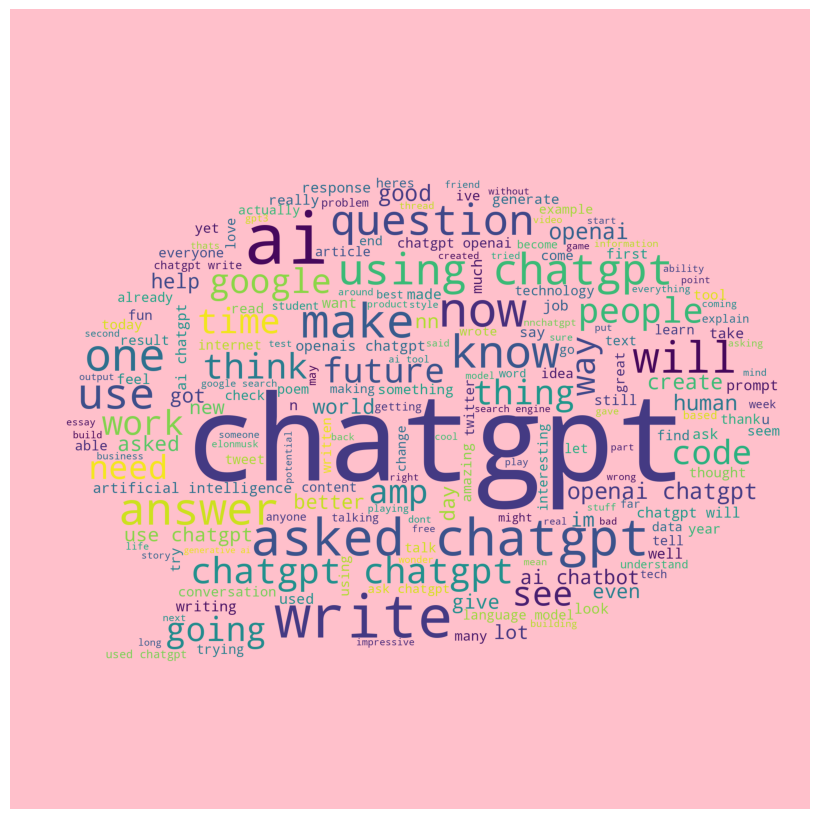

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

comment_words = ''
stopwords = set(STOPWORDS)


for val in df.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
  # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

mask = np.array(Image.open("/content/comment.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='pink',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

####Model Selection

In [26]:


# Map the labels to integers
# 1 for good tweet
# 0 for neutral tweet
# -1 for bad tweet

df['lab_int'] = np.where(df['labels']=='good', 1, np.where(df['labels']=='bad', -1, 0))



In [27]:
# Import sci-kit learn models for classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['lab_int'], test_size=0.3, random_state=1)

In [29]:
vec = CountVectorizer(
    ngram_range=(1, 3),
    stop_words="english",
)

X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.76      0.93      0.83     32288
           0       0.72      0.29      0.41     16710
           1       0.66      0.77      0.71     16791

    accuracy                           0.72     65789
   macro avg       0.71      0.66      0.65     65789
weighted avg       0.72      0.72      0.69     65789



In [32]:
log = LogisticRegression()
log.fit(X_train, y_train)

preds = log.predict(X_test)
print(classification_report(y_test, preds))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.86      0.94      0.90     32288
           0       0.74      0.65      0.69     16710
           1       0.83      0.79      0.81     16791

    accuracy                           0.83     65789
   macro avg       0.81      0.79      0.80     65789
weighted avg       0.82      0.83      0.83     65789



###hyperparameter tuning

In [33]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [34]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   1.1s
[CV] END ..........................................alpha=0.1; total time=   0.9s
[CV] END ..........................................alpha=0.1; total time=   0.7s
[CV] END ..........................................alpha=0.1; total time=   1.4s
[CV] END ..........................................alpha=0.1; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.6s
[CV] END ..........................................alpha=1.0; total time=   0.6s
[CV] END ..........................................alpha=1.0; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   1.0s
[CV] END ..........................................alpha=1.0; total time=   0.5s
[CV] END ..........................................alpha=1.0; total time=   0.4s
[CV] END ...........................................alpha=10; total time=   0.4s
[CV] END ...........................................alpha=10; total time=   0.4s
[CV] END ...........................................alpha=10; total time=   0.4s
[CV] END ...........................................alpha=10; total time=   0.4s
[CV] END ...........................................alpha=10; total time=   0.4s
[CV] END ..........................................alpha=100; total time=   0.4s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)

In [35]:
grid_search.best_params_

{'alpha': 1.0}

###References

https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17

https://www.analyticsvidhya.com/blog/2021/06/nlp-sentiment-analysis/

https://monkeylearn.com/sentiment-analysis/

###Licences:

MIT License


Copyright (c) 2023 Amrutha Sai Edara


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE